Mean Squared Error: 0.9127015125504231


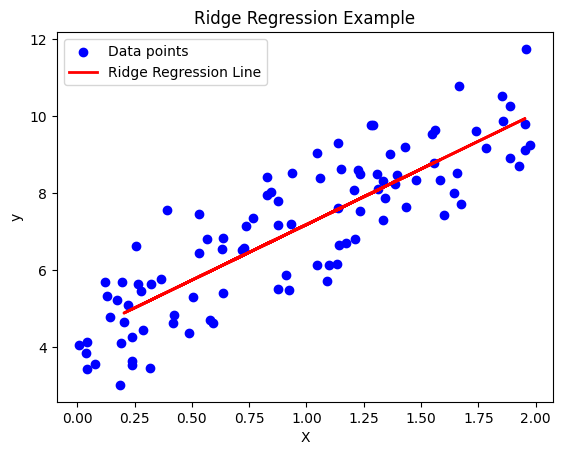

In [1]:
#Ridge Regression Example
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
# Make predictions
y_pred = ridge_reg.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Ridge Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression Example')
plt.legend()
plt.show()



Ridge()
Best alpha: {'alpha': 1}
Best score: -1.0780172842211075

--------------prediction with best alpha-----------------
[8.30039783 4.88856748 9.9414409  8.17422691 8.15185714 8.23884545
 6.96558813 6.13638422 8.87393858 7.47025529 8.79553317 5.82764884
 7.79404067 7.58363356 6.13976915 6.74701593 5.9331157  4.99345878
 7.58138346 8.77286345]



c:\Users\shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


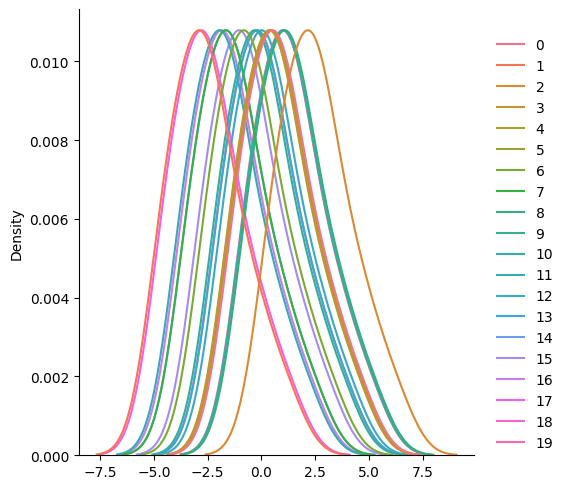

In [14]:
# Ridge Regression Algorithm
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ridge_reg = Ridge()

print(ridge_reg) #obdbject information

parameter_grid = {'alpha': [1, 2, 5 ,10 , 20, 30, 40, 50, 60, 70, 80, 90]}
ridgecv = GridSearchCV(ridge_reg, parameter_grid, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)
print("Best alpha:", ridgecv.best_params_)
# print("Best alpha:", ridgecv)

#find best score
print("Best score:", ridgecv.best_score_)

#pridict 
print("")
print("--------------prediction with best alpha-----------------")
ridge_pred = ridgecv.predict(X_test)
print( ridge_pred)

# Visualize the effect of different alpha values
print("")
sns.displot(ridge_pred - y_test, kind='kde')
plt.show()

Ridge Regression Model: Ridge()
Best alpha: 0.1
Best cross-validation score (Negative MSE): -0.5268254524348714

-------------- Prediction with Best Alpha -----------------


c:\Users\shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


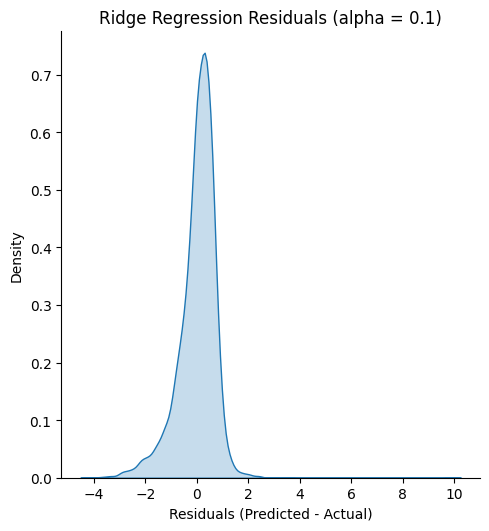

In [ ]:
# Ridge Regression with GridSearchCV (Fixed Version)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load and Split the Data
# -----------------------------
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 2. Create Ridge Model
# -----------------------------
ridge_reg = Ridge()
print("Ridge Regression Model:", ridge_reg)  # Object info

# -----------------------------
# 3. Define Parameter Grid
# -----------------------------
parameter_grid = {
    'alpha': [0.1, 1, 5, 10, 20, 30, 50, 70, 100]
}

# -----------------------------
# 4. Grid Search for Best Alpha
# -----------------------------
ridgecv = GridSearchCV(
    estimator=ridge_reg,
    param_grid=parameter_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

ridgecv.fit(X_train, y_train)

# -----------------------------
# 5. Best Parameters and Score
# -----------------------------
print("Best alpha:", ridgecv.best_params_['alpha'])
print("Best cross-validation score (Negative MSE):", ridgecv.best_score_)

# -----------------------------
# 6. Prediction with Best Model
# -----------------------------
print("\n-------------- Prediction with Best Alpha -----------------")
ridge_pred = ridgecv.predict(X_test)

# -----------------------------
# 7. Visualize Error Distribution
# -----------------------------
sns.displot(ridge_pred - y_test, kind='kde', fill=True)
plt.title(f"Ridge Regression Residuals (alpha = {ridgecv.best_params_['alpha']})")
plt.xlabel("Residuals (Predicted - Actual)")
plt.ylabel("Density")
plt.show()

#score of the model



Best alpha: 1
Best cross-validation score (Negative MSE): -0.954264113746258

-------------- Prediction with Best Alpha -----------------
Root Mean Squared Error (RMSE): 0.9667


c:\Users\shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


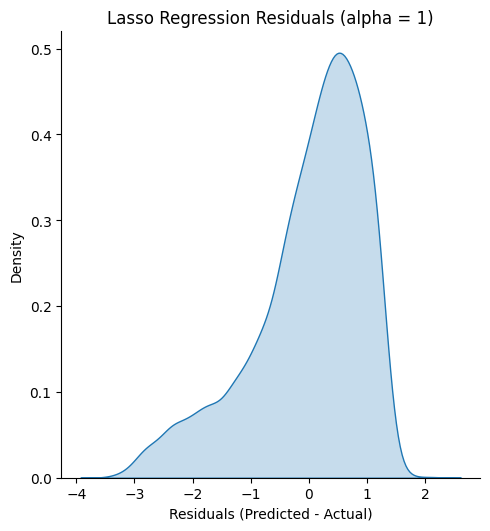

In [20]:
# -----------------------------
# Lasso Regression Example
# -----------------------------
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# -----------------------------
# 1. Load and Split the Data
# -----------------------------
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 2. Create Lasso Model
# -----------------------------
lasso = Lasso(max_iter=10000)  # added high max_iter to avoid convergence warnings

# -----------------------------
# 3. Define Parameter Grid
# -----------------------------
parameter_grid = {'alpha': [ 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]}

# -----------------------------
# 4. Grid Search for Best Alpha
# -----------------------------
lassocv = GridSearchCV(
    estimator=lasso,
    param_grid=parameter_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

lassocv.fit(X_train, y_train)

# -----------------------------
# 5. Best Parameters and Score
# -----------------------------
print("Best alpha:", lassocv.best_params_['alpha'])
print("Best cross-validation score (Negative MSE):", lassocv.best_score_)

# -----------------------------
# 6. Prediction with Best Model
# -----------------------------
print("\n-------------- Prediction with Best Alpha -----------------")
lasso_pred = lassocv.predict(X_test)

# Calculate and show RMSE
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# -----------------------------
# 7. Visualize Error Distribution
# -----------------------------
sns.displot(lasso_pred - y_test, kind='kde', fill=True)
plt.title(f"Lasso Regression Residuals (alpha = {lassocv.best_params_['alpha']})")
plt.xlabel("Residuals (Predicted - Actual)")
plt.ylabel("Density")
plt.show()


Ridge:
  Best alpha: 0.1
  Best Score: -0.5268254524348714
  RMSE: 0.7283965285111094

Lasso:
  Best alpha: 0.1
  Best Score: -0.6084916491539414
  RMSE: 0.7726908992934488


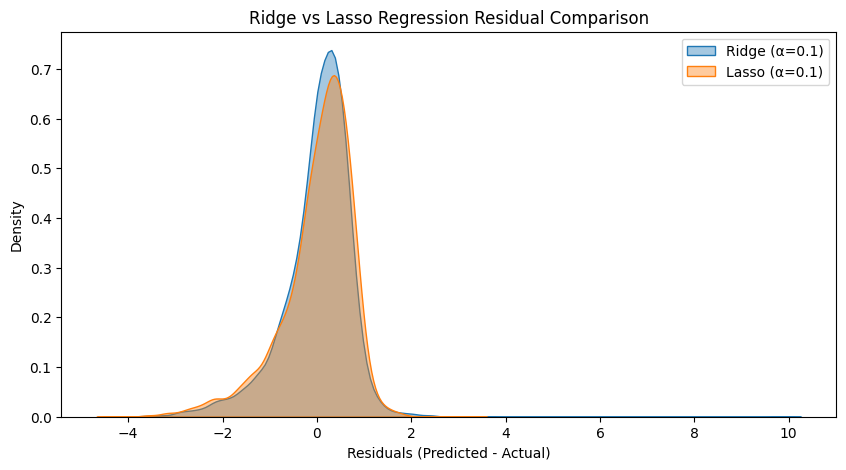

In [21]:
# -----------------------------
# Ridge vs Lasso Regression Comparison
# -----------------------------
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# -----------------------------
# 1. Load and Split Data
# -----------------------------
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 2. Define Parameter Grid
# -----------------------------
param_grid = {'alpha': [0.1, 1, 5, 10, 20, 30, 50, 70, 100]}

# -----------------------------
# 3. Ridge Regression (L2)
# -----------------------------
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("Ridge:")
print("  Best alpha:", ridge_cv.best_params_['alpha'])
print("  Best Score:", ridge_cv.best_score_)
print("  RMSE:", ridge_rmse)

# -----------------------------
# 4. Lasso Regression (L1)
# -----------------------------
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("\nLasso:")
print("  Best alpha:", lasso_cv.best_params_['alpha'])
print("  Best Score:", lasso_cv.best_score_)
print("  RMSE:", lasso_rmse)

# -----------------------------
# 5. Visualization (Side by Side)
# -----------------------------
plt.figure(figsize=(10, 5))

# Ridge
sns.kdeplot(ridge_pred - y_test, label=f'Ridge (α={ridge_cv.best_params_["alpha"]})', fill=True, alpha=0.4)

# Lasso
sns.kdeplot(lasso_pred - y_test, label=f'Lasso (α={lasso_cv.best_params_["alpha"]})', fill=True, alpha=0.4)

plt.title("Ridge vs Lasso Regression Residual Comparison")
plt.xlabel("Residuals (Predicted - Actual)")
plt.ylabel("Density")
plt.legend()
plt.show()
